In [3]:
import tensorflow as tf

# List all physical devices
print("Physical devices:", tf.config.list_physical_devices())

# Check GPU device details
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10149009047567605392
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4133320508150312091
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
train=pd.read_csv('train.csv')
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
train.drop(train[['Name','Cabin','Ticket']],axis=1,inplace=True)
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


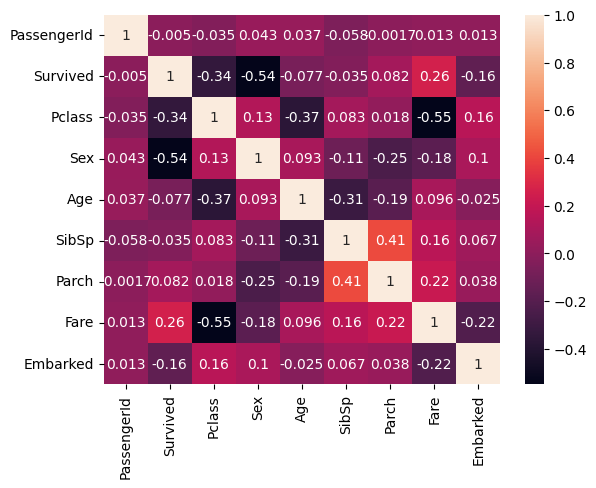

In [7]:
sn.heatmap(train.corr(),annot=True)
plt.show()

In [8]:
tr=['Pclass','Sex','Fare','Embarked','Survived']
od=[]
for column in tr:
  traning_data=pd.DataFrame(train[[column]],columns=[column])
  od.append(traning_data)
odd=pd.concat(od,axis=1)
odd.isnull().sum()

,0
Pclass,0
Sex,0
Fare,0
Embarked,0
Survived,0


In [9]:
test=pd.read_csv('test.csv')
test.drop(test[['Name','Age','SibSp','Parch','Ticket','Cabin']],axis=1,inplace=True)
test['Sex']=le.fit_transform(test['Sex'])
test['Embarked']=le.fit_transform(test['Embarked'])
test.isnull().sum()
test=test.fillna(0)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
odd['Fare']=scale.fit_transform(odd[['Fare']])
odd

,Pclass,Sex,Fare,Embarked,Survived
0,3,1,0.014151,2,0
1,1,0,0.139136,0,1
2,3,0,0.015469,2,1
3,1,0,0.103644,2,1
4,3,1,0.015713,2,0
...,...,...,...,...,...
886,2,1,0.025374,2,0
887,1,0,0.058556,2,1
888,3,0,0.045771,2,0
889,1,1,0.058556,0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
x_train = odd.drop('Survived', axis=1)
y_train = train['Survived']
x_test = test.drop("PassengerId", axis=1)
print(odd.shape,y_train.shape,x_test.shape)
odd

(891, 5) (891,) (418, 4)


,Pclass,Sex,Fare,Embarked,Survived
0,3,1,0.014151,2,0
1,1,0,0.139136,0,1
2,3,0,0.015469,2,1
3,1,0,0.103644,2,1
4,3,1,0.015713,2,0
...,...,...,...,...,...
886,2,1,0.025374,2,0
887,1,0,0.058556,2,1
888,3,0,0.045771,2,0
889,1,1,0.058556,0,1


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
models={'lr':LogisticRegression(),
        'svm':SVC(),
        'knn':KNeighborsClassifier(),
        'tree':DecisionTreeClassifier(),
        'forest':RandomForestClassifier(max_depth=100,criterion='entropy'),
        'gaussian':GaussianNB()}
g=dict()
for key,values in models.items():
  values.fit(x_train,y_train)
  y_pred=values.predict(x_test)
  acc=round(values.score(x_train,y_train)*100,2)
  g[key]=acc
data = [(key, value) for key, value in g.items()]
acc_list=pd.DataFrame(data,columns=['models','accuracy'])
acc_list

,models,accuracy
0,lr,77.78
1,svm,81.14
2,knn,84.40
3,tree,90.91
4,forest,90.80
5,gaussian,77.33


In [14]:
forest=RandomForestClassifier(max_depth=100,criterion='entropy')
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
submission = pd.DataFrame({
        "PassengerId":test["PassengerId"],
        "Survived":pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [15]:
'''submission.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')'''

"submission.to_csv('submission.csv', index=False)\nfrom google.colab import files\nfiles.download('submission.csv')"

,Pclass,Sex,Fare,Embarked,Survived
0,3,1,0.014151,2,0
1,1,0,0.139136,0,1
2,3,0,0.015469,2,1
3,1,0,0.103644,2,1
4,3,1,0.015713,2,0
...,...,...,...,...,...
886,2,1,0.025374,2,0
887,1,0,0.058556,2,1
888,3,0,0.045771,2,0
889,1,1,0.058556,0,1
